# Logistic Regression with Regularization

In [1]:
import helpers as hlp
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

## Configuration

In [2]:
# Configuration Params
learning_rate = 0.001
epochs = 50000
display_step = 100

degree = 6  # feature mapping degree
lmbda = 1000  # regularization parameter

## Import Data

In [3]:
# Import data
train_data = np.loadtxt(
    "../../../data/ex2/ex2data2.txt", dtype="float64", delimiter=",")

train_x_unbiased = np.delete(train_data, -1, axis=1)
train_x = hlp.map_features(
    train_x_unbiased[:, 0], train_x_unbiased[:, 1], degree=degree)

train_y = np.delete(train_data, np.s_[:-1], axis=1)

## Visualize Data

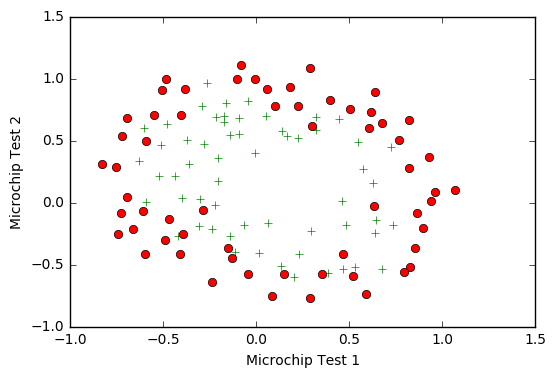

In [4]:
# Visualize Data
labels = {
    "figure_label": "Microchip Test",
    "x_label": "Microchip Test 1",
    "y_label": "Microchip Test 2",
}

hlp.plot_classified_data(train_x, train_y, **labels)

## Define Model

In [5]:
# Parameters
X = tf.placeholder(tf.float64, name="x")
Y = tf.placeholder(tf.float64, name="y")
theta = tf.Variable(
    tf.zeros(
        (train_x.shape[1], 1), dtype=tf.float64), name="theta")
theta_reg = tf.placeholder(tf.float64, name="theta_reg")

m = train_x.shape[0]

# Model
hypothesis = tf.sigmoid(tf.matmul(X, theta))

# Cost function
cost = tf.reduce_sum(1 / m *
                     (-Y * tf.log(hypothesis) -
                      (1 - Y) * tf.log(1 - hypothesis))) + lmbda / (
                          2 * m) * tf.reduce_sum(tf.pow(theta_reg, theta_reg))

# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## Initialization

In [6]:
# Initialize Session
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
epoch = 0

file_writer = tf.summary.FileWriter("logs/reg/run1", sess.graph)

## Run Model

In [7]:
# Run Model
for epoch in range(epochs):
    th_reg = theta.eval()[1:]
    sess.run(optimizer, feed_dict={X: train_x, Y: train_y, theta_reg: th_reg})

    # Print adaption progress
    if epoch % display_step == 0:
        predictions = np.round(hypothesis.eval(feed_dict={X: train_x}))
        accuracy = hlp.get_accuracy(predictions, train_y)

## Results

Optimized Weights 
[[  8.45388093e-01]
 [  3.03653654e-01]
 [  8.10667501e-01]
 [ -1.37995246e+00]
 [ -4.73503164e-01]
 [ -7.71688282e-01]
 [ -3.93057902e-02]
 [ -2.09925289e-01]
 [ -2.09569356e-01]
 [ -2.04606642e-01]
 [ -1.07238150e+00]
 [ -4.86305709e-02]
 [ -3.91402451e-01]
 [ -1.26667411e-01]
 [ -8.60193558e-01]
 [ -2.66511270e-01]
 [ -1.35792011e-01]
 [ -5.60339031e-02]
 [ -1.71390274e-01]
 [ -1.55952692e-01]
 [ -5.01793827e-01]
 [ -8.02218461e-01]
 [ -4.44834226e-03]
 [ -1.96750327e-01]
 [ -4.62913828e-04]
 [ -2.15522237e-01]
 [ -5.87175804e-02]
 [ -8.13365688e-01]]

Accuracy: 82.20338983050848
Cost: nan
Iterations: 49999


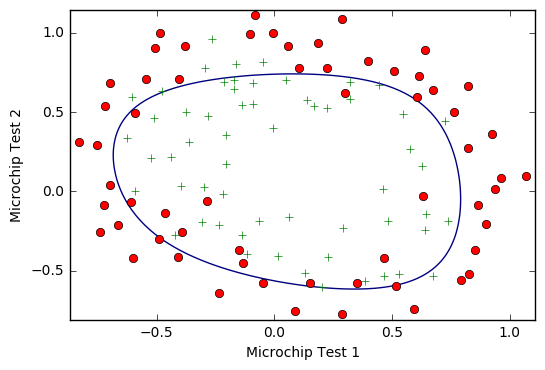

In [8]:
# Results
t = theta.eval()
print("Optimized Weights \n" + str(t) + "\n")
print("Accuracy: " + str(
    hlp.get_accuracy(
        np.round(hypothesis.eval(feed_dict={X: train_x})), train_y)))
print("Cost: " + str(
    cost.eval(feed_dict={X: train_x,
                         Y: train_y,
                         theta_reg: th_reg})))
print("Iterations: " + str(epoch))

# Decision Boundary
hlp.plot_decision_boundary(train_x, train_y, t, **labels)

## Close Session

In [9]:
sess.close()